In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas 

# Simulate One Round
**************

#### 1. Roll the dice
- Attacker rolls 3 di 
- Defender rolls 2 di

In [2]:
rng=np.random.default_rng()
attacker = rng.integers(low=1, high=6, size=3)
defender = rng.integers(low=1, high=6, size=2)

#### 2. Compare the two highest dice rolls 
- Is the attackers highest dice roll greater than the defenders highest dice roll?
- If **False**, i.e. if the attackers highest dice roll is either the same or lower than the defenders, **attacker loses a troop**
- If **True**, i.e. if the attackers highest dice roll is greate than the defenders, **defender loses a troop**

In [6]:
if np.argsort(attacker)[-1] > np.argsort(defender)[-1]:  #Is the attacker's highest dice roll higher than the defenders highest dice roll? 
    print("Defender loses a troop")
else:
    print("Attacker loses a troop")

Attacker loses a troop


#### 3. Compare 2nd highest dice roll
- Is the attackers 2nd highest dice roll greater than the defenders 2nd highest dice roll?
- If false, attacker loses a troop
- If true, defender loses a troop

In [7]:
if np.argsort(attacker)[-2] > np.argsort(defender)[-2]: #Is the attackers's second highest dice roll higher than the defenders second highest dice roll
    print("Defender loses a troop")
else:
    print("Attacker loses a troop") 

Attacker loses a troop


# Simulate 1000 Rounds
********************

- Create an army for both sides
- Simulate 1000 rounds using  ``for i in range(1000)``

In [8]:
attackers_troops = []
for i in range(10000):
    attackers_troops.append("Troop "+str(i+1))

defenders_troops = []
for i in range(10000):
    defenders_troops.append("Troop "+str(i+1))

round = pandas.DataFrame()

for i in range(1000): 
    rng=np.random.default_rng()
    attacker = rng.integers(low=1, high=6, size=3)
    defender = rng.integers(low=1, high=6, size=2)

    #Dice 1 roll
    if np.argsort(attacker)[-1] > np.argsort(defender)[-1]:
        defenders_troops.pop(0)
    else:
        attackers_troops.pop(0)

    #Dice 2 roll
    if np.argsort(attacker)[-2] > np.argsort(defender)[-2]:
        defenders_troops.pop(0)
    else:
        attackers_troops.pop(0)

## Plot the Results
*********************************
- A simple pie chart of number of attacker losses, vs. number of defender losses was plotted. 
- A barplot that included the troops remaining as well as the troops lost was plotted.  

In [44]:
attackers_troops = []
for i in range(2500):
    attackers_troops.append("Troop "+str(i+1))

defenders_troops = []
for i in range(2500):
    defenders_troops.append("Troop "+str(i+1))

rounds = np.zeros([1000,2])

for i in range(1000):
    rng=np.random.default_rng()
    attacker = rng.integers(low=1, high=6, size=3)
    defender = rng.integers(low=1, high=6, size=2)

    attacker_losses = 0
    defender_losses = 0

    #Dice 1 roll
    if np.argsort(attacker)[-1] > np.argsort(defender)[-1]:
        defenders_troops.pop(0)
        defender_losses+=1
    else:
        attackers_troops.pop(0)
        attacker_losses+=1

    #Dice 2 roll
    if np.argsort(attacker)[-2] > np.argsort(defender)[-2]:
        defenders_troops.pop(0)
        defender_losses+=1
    else: 
        attackers_troops.pop(0)
        attacker_losses+=1
    
    round[i] = np.array([attacker_losses,defender_losses])
    rounds[i] = round[i]

attacker_losses = np.sum(rounds[:,1])
defender_losses = np.sum(rounds[:,0])

Text(0.5, 1.0, '1000 Simulated Rounds of Risk')

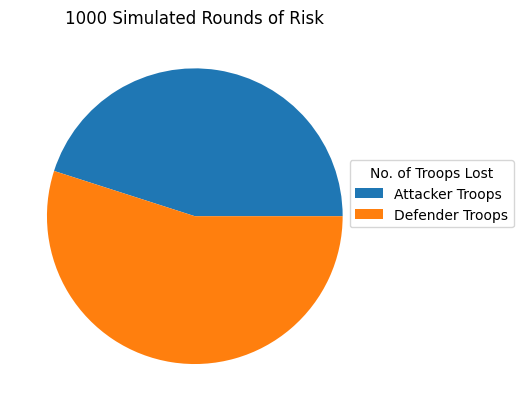

In [45]:
ax = plt.subplot()
ax.pie(rounds.sum(axis=0), labels= ("Attacker Troops", "Defender Troops"), labeldistance=None)
ax.legend(loc="upper left", bbox_to_anchor= (0.9, 0.67), title="No. of Troops Lost")
ax.set_title("1000 Simulated Rounds of Risk")

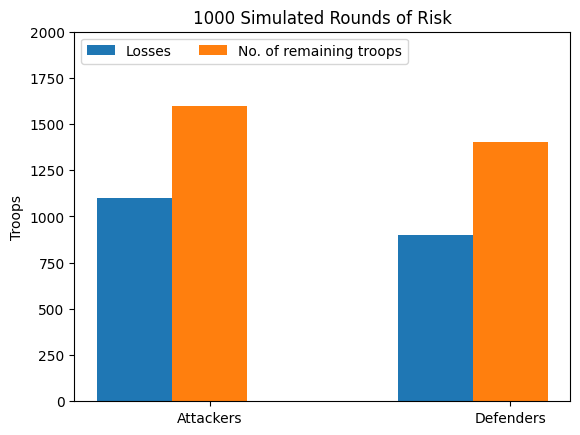

In [46]:
ax = plt.subplot()
ax.bar(
    x= [1,2],
    height = (attacker_losses, defender_losses),
    width=0.25,
    label="Losses")
ax.bar(
    x= [1.25,2.25],
    height = (len(attackers_troops), len(defenders_troops)),
    width=0.25,
    label="No. of remaining troops"
)
ax.set_ylabel("Troops")
ax.set_ylim(0, 2000)
ax.set_xticks([1.25, 2.25])
ax.set_xticklabels(["Attackers", "Defenders"]) 
ax.set_title("1000 Simulated Rounds of Risk")
ax.legend(loc='upper left', ncols=2)
